#### Import the Necessary Libraries


In [19]:
import pandas as pd
import os
from os import listdir


##### Task1 - merge the 12 months of sales data into a single csv file


In [20]:
df = pd.read_csv("C:\\Users\\Joyline\\OneDrive\\Desktop\\Sales_Data\\Sales_April_2019.csv")

files = [file for file in os.listdir("C:\\Users\\Joyline\\OneDrive\\Desktop\\Sales_Data")]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:\\Users\\Joyline\\OneDrive\\Desktop\\Sales_Data\\" + file)
    all_months_data = pd.concat([all_months_data, df])


all_months_data.to_csv("all_data.csv", index=False)
    
    

In [21]:
all_data = pd.read_csv("all_data.csv")
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


### Cleaning the data

In [22]:
nan_df = all_data[all_data.isna().any(axis=1)]# Display all nan Values
display(nan_df.head())

all_data = all_data.dropna(how = "all") # Drop null values
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###  Augument data with additional columns


#### Task2: add month column

#### Find "Or" and delete it

In [23]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]


In [24]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"]= all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert columns to the correct type

In [25]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #make int
all_data["Price Each"] =pd.to_numeric(all_data["Price Each"])  #make float


#### Task3: add a sales column

In [26]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data['Price Each']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task4:Add a City Column

In [27]:
# let's use .apply()
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(' ')[1]


all_data["City"] = all_data["Purchase Address"].apply(lambda x:f"{get_city(x)}({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


##### Question 1 : What was the best month for sales? How much was earned that month? 

In [28]:
all_data.groupby(['Month']).sum()["Sales"]

    

C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\1190551950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()["Sales"]


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\922348786.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, all_data.groupby(['Month']).sum()["Sales"])


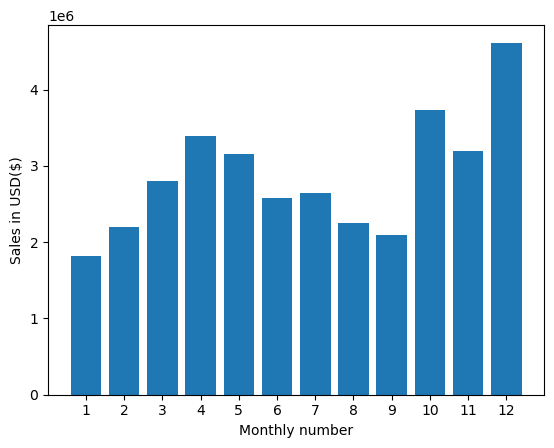

In [29]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, all_data.groupby(['Month']).sum()["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Monthly number")
plt.show()

#### Question2: What City had the highest number of Sales

In [30]:
results = all_data.groupby("City").sum()
results

C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\3196120602.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58
Austin(TX),11153,1809873.61,69829,1819581.75
Boston(MA),22528,3637409.77,141112,3661642.01
Dallas(TX),16730,2752627.82,104620,2767975.40
Los Angeles(CA),33289,5421435.23,208325,5452570.80
New York City(NY),27932,4635370.83,175741,4664317.43
Portland(ME),2750,447189.25,17144,449758.27
Portland(OR),11303,1860558.22,70621,1870732.34
San Francisco(CA),50239,8211461.74,315520,8262203.91


C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\1422309745.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\1422309745.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])


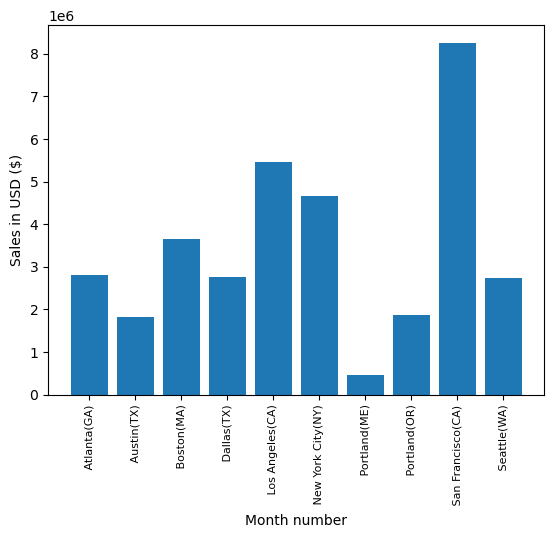

In [31]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [32]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [33]:
all_data["Hour"]= all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


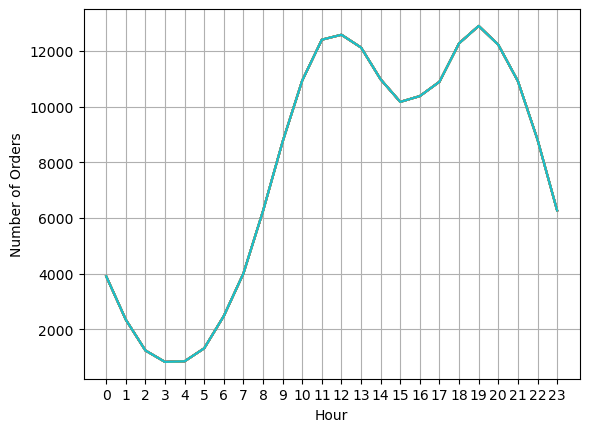

In [34]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


#### Question4: What products are most often sold  together?

In [35]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"]= df.groupby("Order ID")['Product'].transform(lambda x : "," .join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head(20)

C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\689507389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]= df.groupby("Order ID")['Product'].transform(lambda x : "," .join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [36]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10) 


    
    
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Question5:What product Sold the Most? Why do you think it sold the most

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\1181018593.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


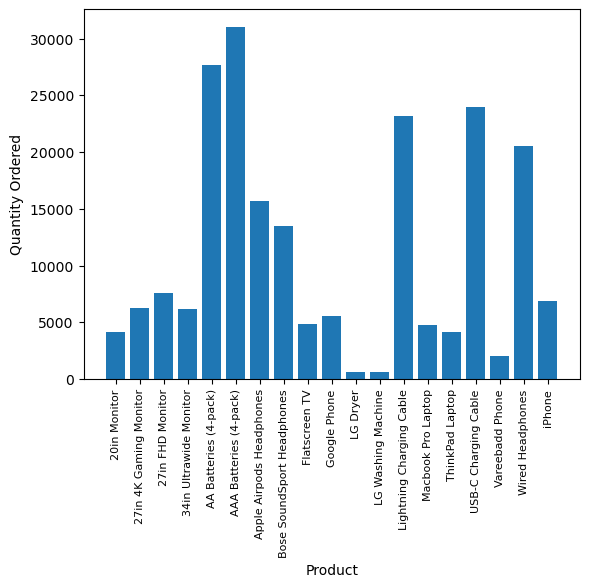

In [40]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation = "vertical", size = 8)
plt.show()

C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\477616501.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby("Product").mean()["Price Each"]
C:\Users\Joyline\AppData\Local\Temp\ipykernel_7608\477616501.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical", size = 8)


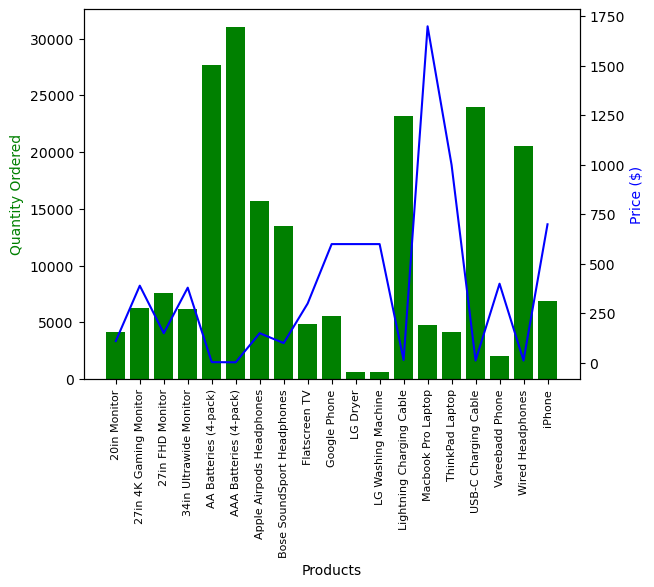

In [39]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = "g")
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation = "vertical", size = 8)

plt.show()